# Regression with a Flood Prediction Dataset

## corelacao de pearson

# pip install
##   tensorflow,
##  numpy
##   scikeras
##   seaborn
##   pandas
##   matplotlib
##   sklearn
##   


In [7]:
import pandas as pd 
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
from keras import layers,models,utils
from keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential


verbose = 0

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

salvando validacao treino e teste

In [145]:
df = pd.read_csv("train_val_df.csv")
df_test = pd.read_csv("test_df.csv")

<Axes: >

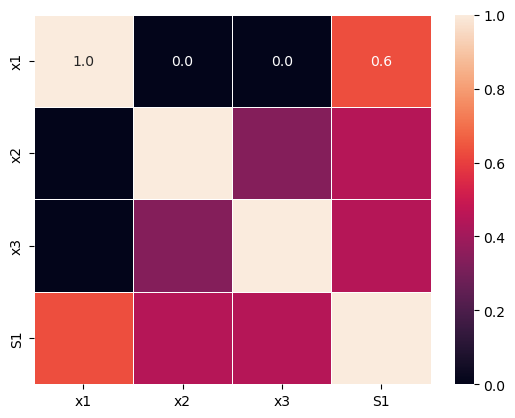

In [146]:
correlation = df.corr()
sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

## Divida os dados de treinamento em entrada X e saída Y

In [147]:
df = df.sample(frac=1, random_state=420).reset_index(drop=True)
print(df)
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values   
respostas = df_test.iloc[:, -1].values
df_test = df_test.iloc[:, :-1]


   x1  x2  x3  S1
0   1   1   1   1
1   1   0   0   0
2   0   1   1   0
3   0   1   0   0
4   0   0   0   0
5   0   0   1   0


## Create a model with optimizer and init


In [148]:
def create_model(optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Dense(2, input_dim=X.shape[1], activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))  # Para uma saída binária
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
create_model()

<Sequential name=sequential_55, built=True>

Epoch 1/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1595 - loss: 0.7413      
Epoch 2/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0476 - loss: 0.7456     
Epoch 3/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1119 - loss: 0.7448     
Epoch 4/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1119 - loss: 0.7371     
Epoch 5/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1595 - loss: 0.7264     
Epoch 6/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3738 - loss: 0.6965 
Epoch 7/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0476 - loss: 0.7314     
Epoch 8/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1119 - loss: 0.7143     
Epoch 9/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1595 - loss: 0.7135     
Epoch 10/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1595 - loss: 0.7146     
Epoch 11/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0762 - loss: 0.7217     
Epoch 12/2000
6/6 ━━━━

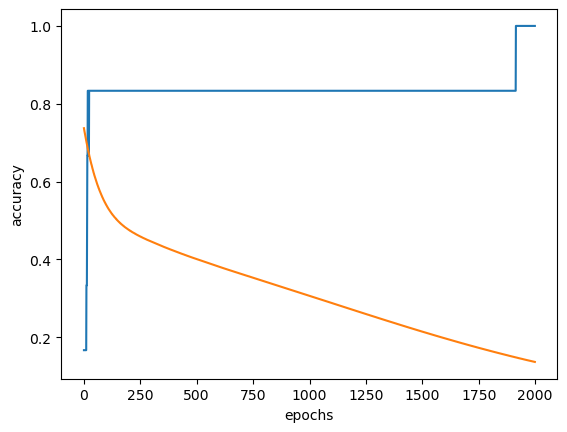

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [150]:
model = create_model()

historia = model.fit(X, y, epochs=2000, batch_size=1, verbose=1)
plt.plot(historia.history['accuracy'])
plt.plot(historia.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()
prediction = model.predict(df_test)

##

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[0, 0] [0 0]


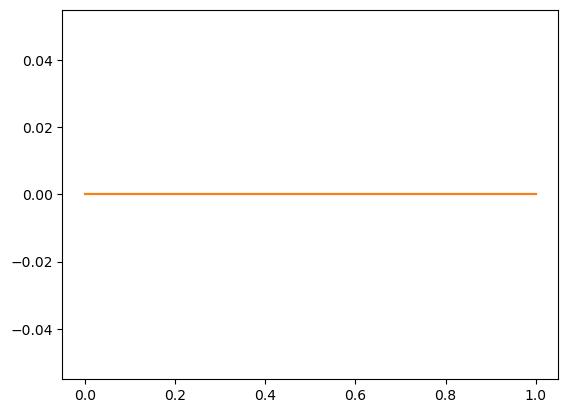

Pesos da primeira camada:
[[-1.1822962 -3.1656775]
 [-1.4351189 -0.8564883]
 [-2.3632488 -1.1632899]]
Bias da primeira camada:
[1.7737107 2.334307 ]


In [152]:


prediction = model.predict(df_test)
prediction = [0 if p < 0.5 else 1 for p in prediction]
print(prediction,respostas)

plt.plot(prediction)
plt.plot(respostas)
plt.show()
primeira_camada_pesos = model.layers[0].get_weights()

print("Pesos da primeira camada:")
print(primeira_camada_pesos[0])  # Pesos
print("Bias da primeira camada:")
print(primeira_camada_pesos[1])  # Bias


